# Weekly cycle on control diseases

```{contents}
:local:
:depth: 3
```

## Preamble

### Imports

In [15]:
import numpy as np
import pandas as pd
import plotnine as p9

from glob import glob
from prophet import Prophet
from mizani.formatters import percent_format

Importing plotly failed. Interactive plots will not work.


### Pre-sets

In [6]:
p9.options.set_option('base_family', 'Bitstream Vera Serif')
p9.theme_set(p9.theme_bw() 
           + p9.theme(title=p9.element_text(size=9),
                      axis_text=p9.element_text(size=6),
                      axis_title=p9.element_text(size=8),
                      strip_text=p9.element_text(size=7),
                      legend_key_size=7,    
                      legend_text=p9.element_text(size=6),
                      legend_title=p9.element_text(size=8),
                      figure_size=(4, 3),
                      dpi=300)
)

## Data Loading and Wrangling

In [ ]:
pref_codes = {1: 'Hokkaido',
              2: 'Aomori',
              3: 'Iwate',
              4: 'Miyagi',
              5: 'Akita',
              6: 'Yamagata',
              7: 'Fukushima',
              8: 'Ibaraki',
              9: 'Tochigi',
              10: 'Gunma',
              11: 'Saitama',
              12: 'Chiba',
              13: 'Tokyo',
              14: 'Kanagawa',
              15: 'Niigata',
              16: 'Toyama',
              17: 'Ishikawa',
              18: 'Fukui',
              19: 'Yamanashi',
              20: 'Nagano',
              21: 'Gifu',
              22: 'Shizuoka',
              23: 'Aichi',
              24: 'Mie',
              25: 'Shiga',
              26: 'Kyoto',
              27: 'Osaka',
              28: 'Hyogo',
              29: 'Nara',
              30: 'Wakayama',
              31: 'Tottori',
              32: 'Shimane',
              33: 'Okayama',
              34: 'Hiroshima',
              35: 'Yamaguchi',
              36: 'Tokushima',
              37: 'Kagawa',
              38: 'Ehime',
              39: 'Kochi',
              40: 'Fukuoka',
              41: 'Saga',
              42: 'Nagasaki',
              43: 'Kumamoto',
              44: 'Oita',
              45: 'Miyazaki',
              46: 'Kagoshima',
              47: 'Okinawa'}


### Heat Strokes

In [7]:
columns = ['Date',
	       'Prefecture Code',
           'total_transported',
           'Newborn',
           'Infant',
	       'Juvenile',
           'Adult',
           'Elderly',
           'Unknown', 
           'Level: Death',
           'Level: Severe',
           'Level: Moderate',
           'Level: Mild',
           'Level: Minor',
           'Level: Other',
           'location: residence',
           'location: workplace (1)',
           'location: workplace (2)',
           'location: educational institution',
           'location: public (indoor)',
           'location: public (outdoor)',
           'location: road',
           'location: other']

In [11]:
hs_full = (pd.read_csv('../data/control_diseases/heatstroke/hs_full.csv')
                   .assign(Date=lambda x: pd.to_datetime(x.Date))
)

In [12]:
hs_tokyo = (hs_full
            .query('prefecture=="Tokyo"')
            .assign(day_of_year=lambda x: x['Date'].dt.dayofyear)
            .assign(week_day=lambda x: x['Date'].dt.day_name())
            .assign(month=lambda x: x['Date'].dt.month_name())
            .assign(year=lambda x: x['Date'].dt.year)
            [['Date', 'day_of_year', 'week_day', 'month', 'year', 'total_transported']]
)

### Flu

## Analysis

### Visualization

/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


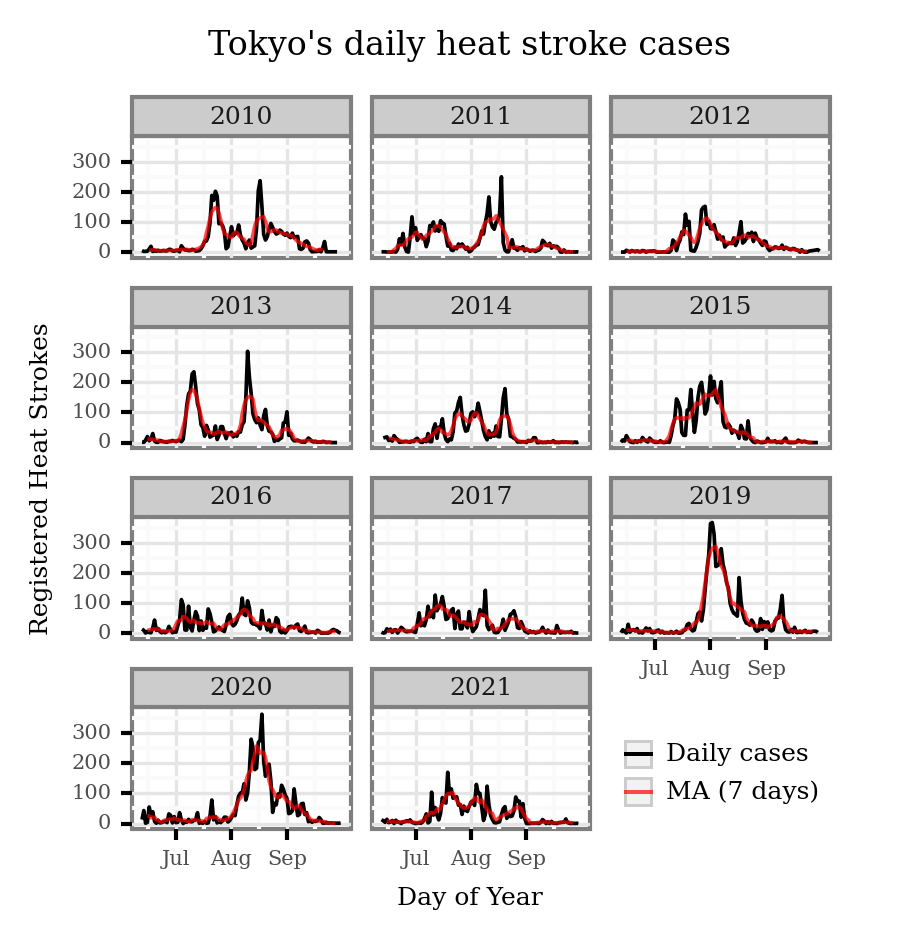

<ggplot: (8766793023751)>

In [17]:
(hs_tokyo
.loc[lambda dd: dd.day_of_year > 162]
.query('year > 2009')
.groupby('year')
.apply(lambda dd: dd.assign(rolling_cases=lambda dd: dd.total_transported.rolling(7, center=True).mean()))
.reset_index(drop=True)
.melt(['Date', 'day_of_year', 'week_day', 'month', 'year'])
.replace({'variable': {'rolling_cases': 'MA (7 days)', 'total_transported': 'Daily cases'}})
.pipe(lambda dd: p9.ggplot(dd) 
                       + p9.aes('day_of_year', 'value', color='variable', alpha='variable')
                       + p9.geom_line()
                       + p9.facet_wrap('year', ncol=3)
                       + p9.scale_color_manual(['black', 'red'])
                       + p9.scale_alpha_manual([1, .7])
                       + p9.scale_x_continuous(breaks=[182, 213, 244], labels=['Jul', 'Aug', 'Sep'])
                       + p9.labs(x='Day of Year', y='Registered Heat Strokes', title="Tokyo's daily heat stroke cases", alpha='', color='')
                       + p9.theme(figure_size=(3, 3),
                                  axis_title=p9.element_text(size=6),
                                  title=p9.element_text(size=8),
                                  axis_text=p9.element_text(size=5),
                                  strip_text=p9.element_text(size=6),
                                  legend_position=(0.78, .2)))
)

/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


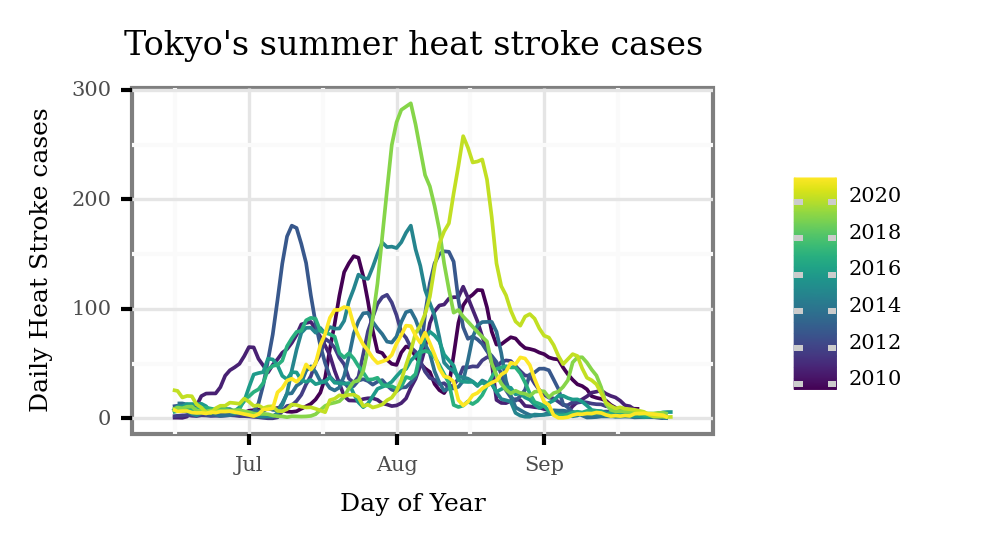

<ggplot: (8766792684541)>

In [19]:
(hs_tokyo
.loc[lambda dd: dd.day_of_year > 162]
.query('year > 2009')
.groupby('year')
.apply(lambda dd: dd.assign(rolling_cases=lambda dd: dd.total_transported.rolling(7, center=True).mean()))
.reset_index(drop=True)
.pipe(lambda dd: p9.ggplot(dd) 
                       + p9.aes('day_of_year', 'rolling_cases', color='year', group='year')
                       + p9.geom_line()
                       + p9.scale_x_continuous(breaks=[182, 213, 244], labels=['Jul', 'Aug', 'Sep'])
                       + p9.labs(x='Day of Year', y='Daily Heat Stroke cases', title="Tokyo's summer heat stroke cases", alpha='', color='')
                       + p9.scale_color_continuous(breaks=range(2010, 2022, 2))
                       + p9.theme(figure_size=(2.5, 1.5),
                                  axis_title=p9.element_text(size=6),
                                  title=p9.element_text(size=8),
                                  axis_text=p9.element_text(size=5),
                                  strip_text=p9.element_text(size=6),
                                  legend_text=p9.element_text(size=5, va='baseline'),
                                )
                                  )
)

### Seasonal model fits

#### Heat strokes

In [ ]:
hs_ts = (hs_tokyo
        .assign(ds=lambda dd: pd.to_datetime(dd.Date))
        .set_index('ds')
        .resample('D')
        .total_transported
        .sum()
        .rename('y')
        ['2010':'2020-12-31']
        .reset_index()
        .rename(columns={'date': 'ds'})
)

In [ ]:
m_hs = Prophet(weekly_seasonality=True,
               yearly_seasonality=True,
               seasonality_mode='multiplicative',
               mcmc_samples=100)

m_hs.fit(hs_ts)
coefs_hs = (m_hs
            .predict()
            .assign(day=lambda dd: dd['ds'].dt.day_name())
            [['day', 'weekly']]
            .drop_duplicates()
)

In [28]:
predf = (m_hs
.predict()
)

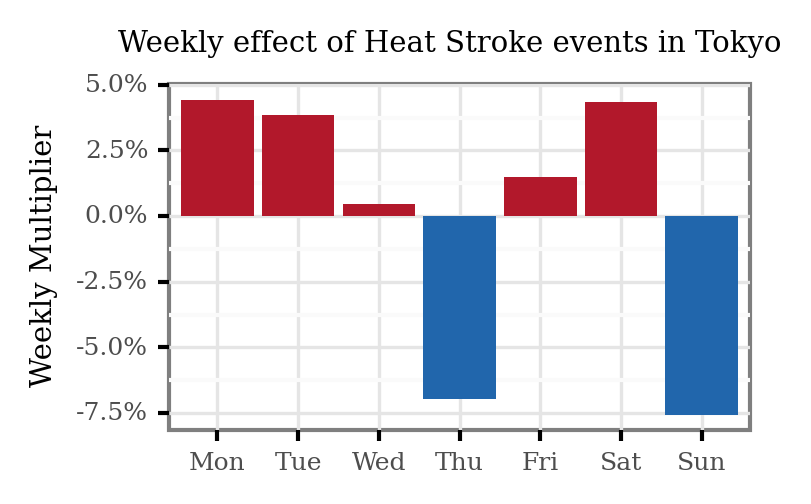

<ggplot: (8766792982763)>

In [55]:
(coefs_hs
 .assign(day=lambda dd: pd.Categorical(dd.day.str[:3],
         categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
         ordered=True))
 .iloc[:7]
 .pipe(lambda dd: p9.ggplot(dd) 
                + p9.aes('day', 'weekly') 
                + p9.geom_col()
                + p9.geom_col(p9.aes(fill='weekly > 0'))
                + p9.scale_fill_manual(['#2166AC', '#B2182B'])
                + p9.scale_y_continuous(labels=percent_format())
                + p9.labs(x='', y='Weekly Multiplier', title='Weekly effect of Heat Stroke events in Tokyo')
                + p9.guides(fill=False)
                + p9.theme(figure_size=(2.5, 1.5), title=p9.element_text(size=7))
                )
)

#### Flu

In [25]:
ts_flu = (pd.read_csv('../data/control_diseases/influenza_a/flu_a_kawasaki_city.csv')
            .assign(date=lambda dd: pd.to_datetime(dd['Year'].astype(str) + 
                                '-' + dd['Month'].astype(str).str.zfill(2) +
                                '-' + dd['Day'].astype(str).str.zfill(2)))
            [['date', 'Total']]
            .rename(columns={'date': 'ds', 'Total': 'y'})
)

In [ ]:
m_flu = Prophet(weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative',
                mcmc_samples=100)
m_flu.fit(ts_flu)
coefs = m_flu.predict().assign(day=lambda dd: dd['ds'].dt.day_name())

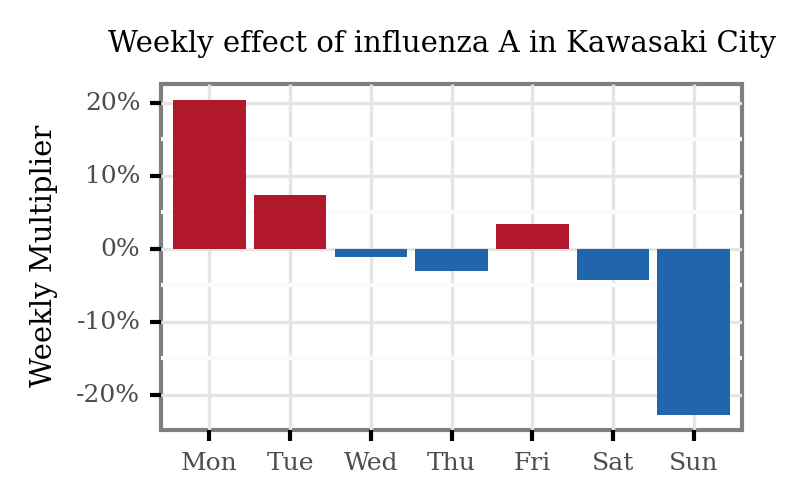

<ggplot: (8766823456253)>

In [67]:
(coefs
 .assign(day=lambda dd: pd.Categorical(dd.day.str[:3], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True))
 .iloc[:7]
 .pipe(lambda dd: p9.ggplot(dd) 
                + p9.aes('day', 'weekly') 
                + p9.geom_col()
                + p9.geom_col(p9.aes(fill='weekly > 0'))
                + p9.scale_fill_manual(['#2166AC', '#B2182B'])
                + p9.scale_y_continuous(labels=percent_format())
                + p9.labs(x='', y='Weekly Multiplier', title='Weekly effect of influenza A in Kawasaki City')
                + p9.guides(fill=False)
                + p9.theme(figure_size=(2.5, 1.5), title=p9.element_text(size=7))
                )
)

#### Both diseases side by side

/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

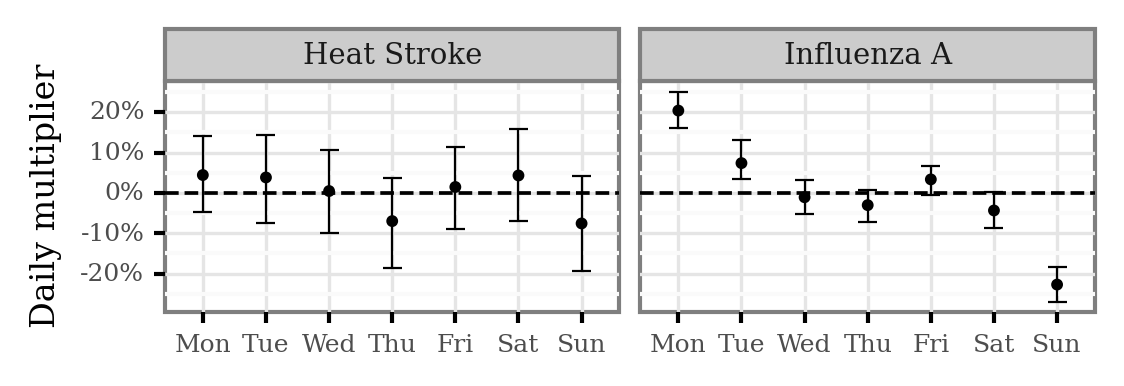

<ggplot: (8766855856150)>

In [83]:
(pd.concat([coefs
          .iloc[:7]
          .assign(disease='Influenza A'),
          predf.assign(disease='Heat Stroke').iloc[:7]])
         .assign(day=lambda dd: dd['ds'].dt.day_name())
         .assign(day=lambda dd: pd.Categorical(dd.day.str[:3],
         categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
         ordered=True))
 .pipe(lambda dd: p9.ggplot(dd) 
                + p9.annotate(geom='hline', yintercept=0, linetype='dashed')
                + p9.geom_point(p9.aes(x='day', y='weekly'), size=.6)
                + p9.geom_errorbar(p9.aes('day', ymax='weekly_upper', ymin='weekly_lower'),
                                   size=.3, width=.3)
                + p9.scale_y_continuous(labels=percent_format())
                + p9.theme(figure_size=(4, 1))
                + p9.labs(x='', y='Daily multiplier')
                + p9.facet_wrap('disease')
                )
)

/tmp/ipykernel_894334/1693530334.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/afontal/.cache/pypoetry/virtualenvs/kd-metals-swc-La39c6PI-py3.8/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


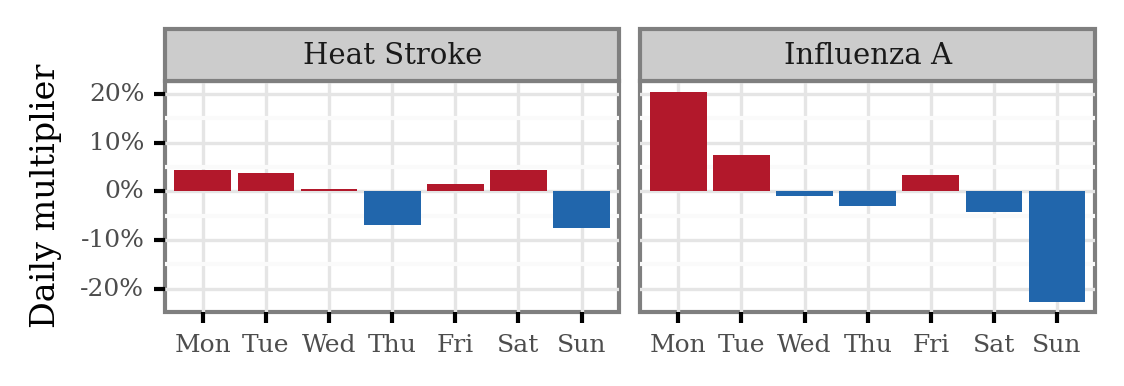

<ggplot: (8766855801676)>

In [82]:
(coefs
 .iloc[:7]
 .assign(disease='Influenza A')
 .append(predf.assign(disease='Heat Stroke').iloc[:7])
  .assign(day=lambda dd: dd['ds'].dt.day_name())
 .assign(day=lambda dd: pd.Categorical(dd.day.str[:3],
         categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
         ordered=True))
 .pipe(lambda dd: p9.ggplot(dd) 
                + p9.geom_col(p9.aes(x='day', y='weekly', fill='weekly > 0'))
                + p9.scale_fill_manual(['#2166AC', '#B2182B'])
                + p9.scale_y_continuous(labels=percent_format())
                + p9.theme(figure_size=(4, 1))
                + p9.labs(x='', y='Daily multiplier')
                + p9.facet_wrap('~disease')
                + p9.guides(fill=False)
                )
)